In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import os
import warnings
from MHW_Forecasts_New import mhwfile
warnings.filterwarnings("ignore", category=RuntimeWarning) # ignore runtime warnings; here they arise from attempted operations on all-NaN arrays

In [3]:
years = [1991, 2020]
clim_years = [1991, 2020]
basepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW'

In [4]:
f0=xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/OISST/oisst-avhrr-v02r01.regridded1x1.monthly.1991_2020.nc')
f1=xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/OISST/mhw_detrended_oisst-avhrr-v02r01.regridded1x1.monthly.1991_2020.nc')


In [5]:
f1

<xarray.Dataset> Size: 194MB
Dimensions:     (X: 360, Y: 181, S: 360, Mon: 12)
Coordinates:
  * X           (X) float32 1kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y           (Y) float32 724B -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * S           (S) float32 1kB 372.0 373.0 374.0 375.0 ... 729.0 730.0 731.0
  * Mon         (Mon) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    lon         (X) float32 1kB ...
    lat         (Y) float32 724B ...
    time        (S) float32 1kB ...
    year        (S) int64 3kB ...
    month       (S) int64 3kB ...
    sst_an_thr  (Mon, Y, X) float64 6MB ...
    is_mhw      (S, Y, X) float64 188MB ...

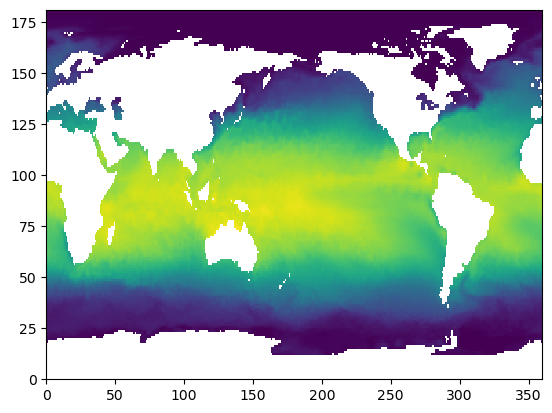

In [6]:
plt.pcolormesh(f0.sst[0,:,:])

Text(390, 4, 'Time')

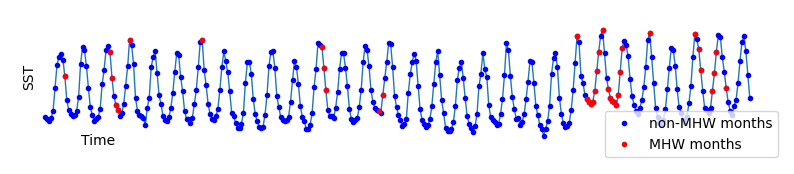

In [10]:
fig,ax=plt.subplots(1,1,figsize=(10,2))
ax.plot(f0.S,f0.sst[:,140,220],'-',lw=1)
ax.plot(f0.S,f0.sst[:,140,220],'b.',label='non-MHW months')
ix=f1.is_mhw[:,140,220].values==1
ax.plot(f0.S.values[ix],f0.sst[:,140,220].values[ix],'r.',label='MHW months')
ax.set_ylim(2,18)
ax.legend(loc=4)
ax.axis('off')
ax.text(360,10,'SST',rotation=90)
ax.text(390,4,'Time')

In [5]:
# obs file
if is_detrend:
    mmedir = basepath+'/mhw/detrended'
    f_obs = basepath+f'/OISST/mhw_detrended_oisst-avhrr-v02r01.regridded1x1g2.monthly.{years[0]}_{years[-1]}.nc'
else:
    mmedir = basepath+'/mhw'
    f_obs = basepath+f'/OISST/mhw_oisst-avhrr-v02r01.regridded1x1g2.monthly.{years[0]}_{years[-1]}.nc'

In [6]:
fobs=xr.open_dataset(f_obs)

In [7]:
def fSEDI(il):
    if is_detrend:
        f_save = f'{basepath}/newHindcastMonthly/SEDI_CanHCNew_l{il}_detrended_{years[0]}_{years[1]}.nc'
    else:
        f_save = f'{basepath}/newHindcastMonthly/SEDI_CanHCNew_l{il}_{years[0]}_{years[1]}.nc'
    return f_save

In [8]:
il=0
f_for=mhwfile(il,years,'detr' if is_detrend else 'base',0.9)
f_for

'/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/mhw_detr_HC_l0_1991_2020_p90.nc'

In [9]:
ffor=xr.open_dataset(f_for,chunks={'lon':10,'lat':10,'M':-1} )

In [10]:
ffor

<xarray.Dataset> Size: 7GB
Dimensions:     (S: 360, M: 40, Y: 180, X: 360, lon: 360, lat: 180)
Coordinates:
  * S           (S) int64 3kB 252 253 254 255 256 257 ... 607 608 609 610 611
  * lon         (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * M           (M) int64 320B 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
Dimensions without coordinates: Y, X
Data variables:
    start_time  (S) int64 3kB dask.array<chunksize=(360,), meta=np.ndarray>
    mhw         (S, M, Y, X) int64 7GB dask.array<chunksize=(360, 40, 180, 360), meta=np.ndarray>

In [11]:
ffor.mhw[:,0,100,200].load()

<xarray.DataArray 'mhw' (S: 360)> Size: 3kB
array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
  * S        (S) int64 3kB 252 253 254 255 256 257 ... 606 607 608 609 610 611
    M        int64 8B 1

In [12]:
M=xr.where(np.isnan(ffor.mhw),0,1).sum(dim='M').mean(dim='S')
Ms=np.unique(M)
Ms

array([40.])

In [13]:
M=Ms[0]
mhwfor=ffor.mhw.data[:(-1*il if il>0 else len(ffor.start_time)),...]
mhwobs=fobs.is_mhw.data[il:,...]
N_pos=np.sum(mhwfor,axis=1).compute()
N_neg=np.sum((mhwfor==0).astype(float),axis=1).compute()
TP=np.where(mhwobs==1,N_pos,0)
TN=np.where(mhwobs==0,N_neg,0)
FP=np.where(mhwobs==0,N_pos,0)
FN=np.where(mhwobs==1,N_neg,0)

# calculate SEDI, summed over time
Nobs_pos=np.sum(mhwobs,axis=0)
Nobs_neg=np.sum(1-mhwobs,axis=0)
F=np.sum(FP,axis=0)/(Nobs_neg*M)
H=np.sum(TP,axis=0)/(Nobs_pos*M)

SEDI=(np.log(F)-np.log(H)-np.log(1-F)+np.log(1-H))/(np.log(F)+np.log(H)+np.log(1-F)+np.log(1-H))
lmask=np.sum(fobs.is_mhw.data,axis=0)==0
icemask=AmaxH>0.5

In [14]:
def calcSEDI_il(il,save=False):
    # Loop through models
    f_for=mhwfile(il,years,'detr' if is_detrend else 'base',0.9)
    ffor=xr.open_dataset(f_for,chunks={'lon':10,'lat':10,'M':-1} )

    M=xr.where(np.isnan(ffor.mhw),0,1).sum(dim='M').mean(dim='S')
    
    Ms=np.unique(M)
    if len(Ms)>1: raise Exception('check M')
    M=Ms[0]
    mhwfor=ffor.mhw.data[:(-1*il),...]
    mhwobs=fobs.is_mhw.data[il:,...]
    N_pos=np.sum(mhwfor,axis=1).compute()
    N_neg=np.sum((mhwfor==0).astype(float),axis=1).compute()
    TP=np.where(mhwobs==1,N_pos,0)
    TN=np.where(mhwobs==0,N_neg,0)
    FP=np.where(mhwobs==0,N_pos,0)
    FN=np.where(mhwobs==1,N_neg,0)
    
    # calculate SEDI, summed over time
    Nobs_pos=np.sum(mhwobs,axis=0)
    Nobs_neg=np.sum(1-mhwobs,axis=0)
    F=np.sum(FP,axis=0)/(Nobs_neg*M)
    H=np.sum(TP,axis=0)/(Nobs_pos*M)
    
    SEDI=(np.log(F)-np.log(H)-np.log(1-F)+np.log(1-H))/(np.log(F)+np.log(H)+np.log(1-F)+np.log(1-H))
    lmask=np.sum(fobs.is_mhw.data,axis=0)==0
    icemask=AmaxH>0.5
    if save:
        f_save=fSEDI(il)
        xout=xr.Dataset(data_vars={'lon':(['X',],ffor.lon.values),
                    'lat':(['Y',],ffor.lat.values),
                    'SEDI':(['Y','X'],SEDI),
                    'lmask':(['Y','X'],lmask),
                    'icemask':(['Y','X'],icemask)},
                    coords=dict(X=ffor.X,Y=ffor.Y),)
        xout.to_netcdf(f_save,mode='w')
    ffor.close()
    return lmask,np.ma.masked_where(icemask,SEDI)

In [15]:
def get_SEDI(il,save=False):
    f_save=fSEDI(il)
    print(f_save)
    if os.path.exists(f_save):
        with xr.open_dataset(f_save) as ff:
            lm=np.array(ff.lmask.values)
            ice=np.array(ff.icemask.values)
            SEDI=np.array(ff.SEDI.values)
            return lm,np.ma.masked_where(ice,SEDI)
    else:
        return calcSEDI_il(il,True)

### SEDI plot for CanCM4i & GEM-NEMO only

/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/SEDI_CanHCNew_l1_detrended_1991_2020.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/SEDI_CanHCNew_l3_detrended_1991_2020.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/SEDI_CanHCNew_l6_detrended_1991_2020.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/newHindcastMonthly/SEDI_CanHCNew_l10_detrended_1991_2020.nc


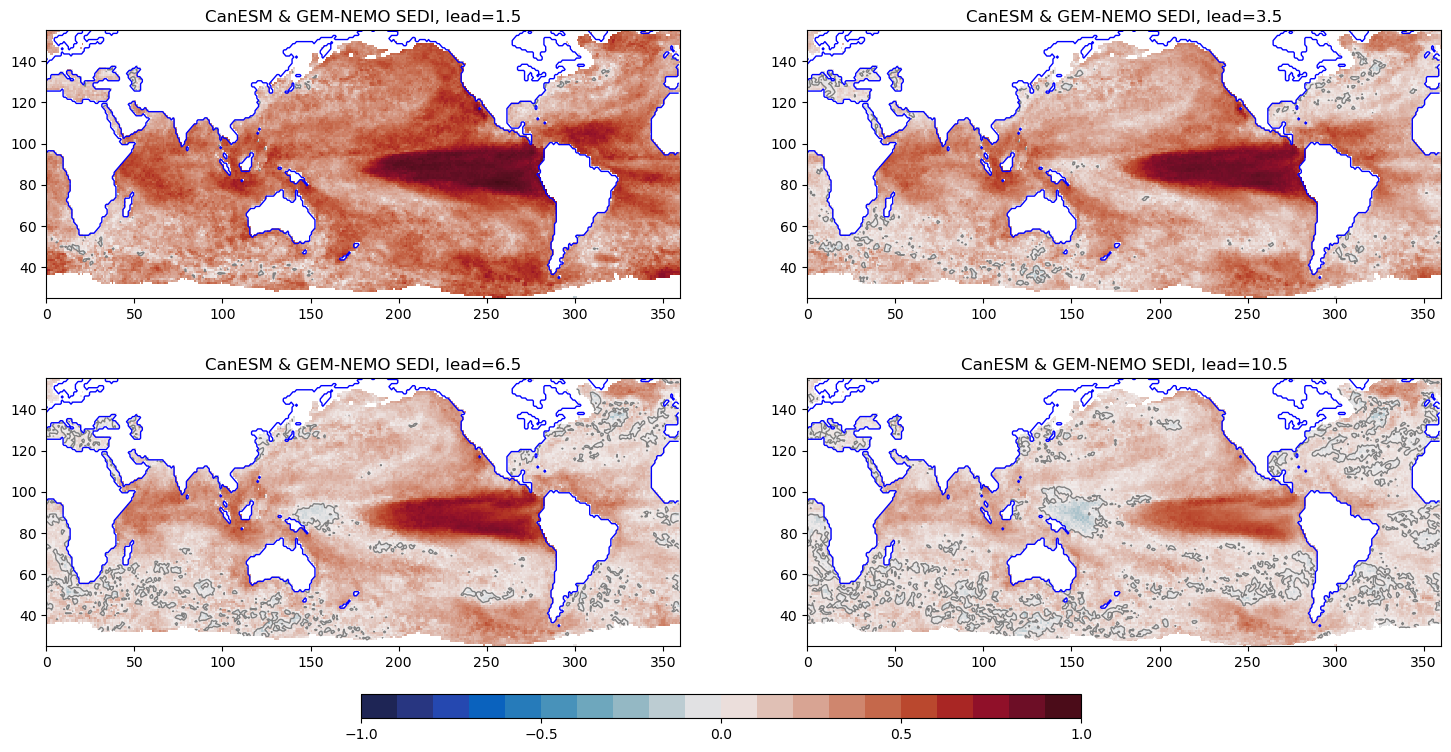

In [16]:
SEDICan=dict()
fig,axs=plt.subplots(2,2,figsize=(18,8),gridspec_kw={'hspace':.3})
ax=axs[0,0]; il=1
lm,SEDI=get_SEDI(il,True)
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM & GEM-NEMO SEDI, lead={il+.5}')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[0,1]; il=3
lm,SEDI=get_SEDI(il,True)
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM & GEM-NEMO SEDI, lead={il+.5}')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[1,0]; il=6
lm,SEDI=get_SEDI(il,True)
#m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM & GEM-NEMO SEDI, lead={il+.5}')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ax=axs[1,1]; il=10
lm,SEDI=get_SEDI(il,True)
m=ax.contourf(SEDI,levels=np.arange(-1,1.1,.1),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m1=ax.pcolormesh(SEDI,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
#fig.colorbar(m,ax=ax)
ax.set_ylim(25,155)
ax.set_title(f'CanESM & GEM-NEMO SEDI, lead={il+.5}')
m3=ax.contour(lm,linewidths=1,colors='b')
SEDICan[il]=SEDI.copy()

ml=fig.add_axes([.3,.02,.4,.03])
fig.colorbar(m,cax=ml,orientation='horizontal',ticks=[-1.0,-.5,0,.5,1.0])

In [17]:
fobs.close()

In [18]:
SEDINMME=dict()
for il in (1,3,6,10):
    if is_detrend:
        f_NMME = f'{mmedir}/SEDI_MME_l{il}_detrended_{years[0]}_{years[1]}.nc'
    else:
        f_NMME = f'{mmedir}/SEDI_MME_l{il}_{years[0]}_{years[1]}.nc'
    print(f_NMME)
    with xr.open_dataset(f_NMME) as fN:
        s0=fN.SEDI.data.copy()
        SEDINMME[il]=s0[1:,:]
        #SEDINMME[il]=(s0[1:,:]+s0[:-1,:])/2#np.ma.masked_where(fN.icemask.data,fN.SEDI.data).copy()

/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/mhw/detrended/SEDI_MME_l1_detrended_1991_2020.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/mhw/detrended/SEDI_MME_l3_detrended_1991_2020.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/mhw/detrended/SEDI_MME_l6_detrended_1991_2020.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW/mhw/detrended/SEDI_MME_l10_detrended_1991_2020.nc


NOTE: there is currently a half degree offset in lat and lon between Can-New and NMME

### Difference in SEDI, CanCM4i & GEM-NEMO - NMME

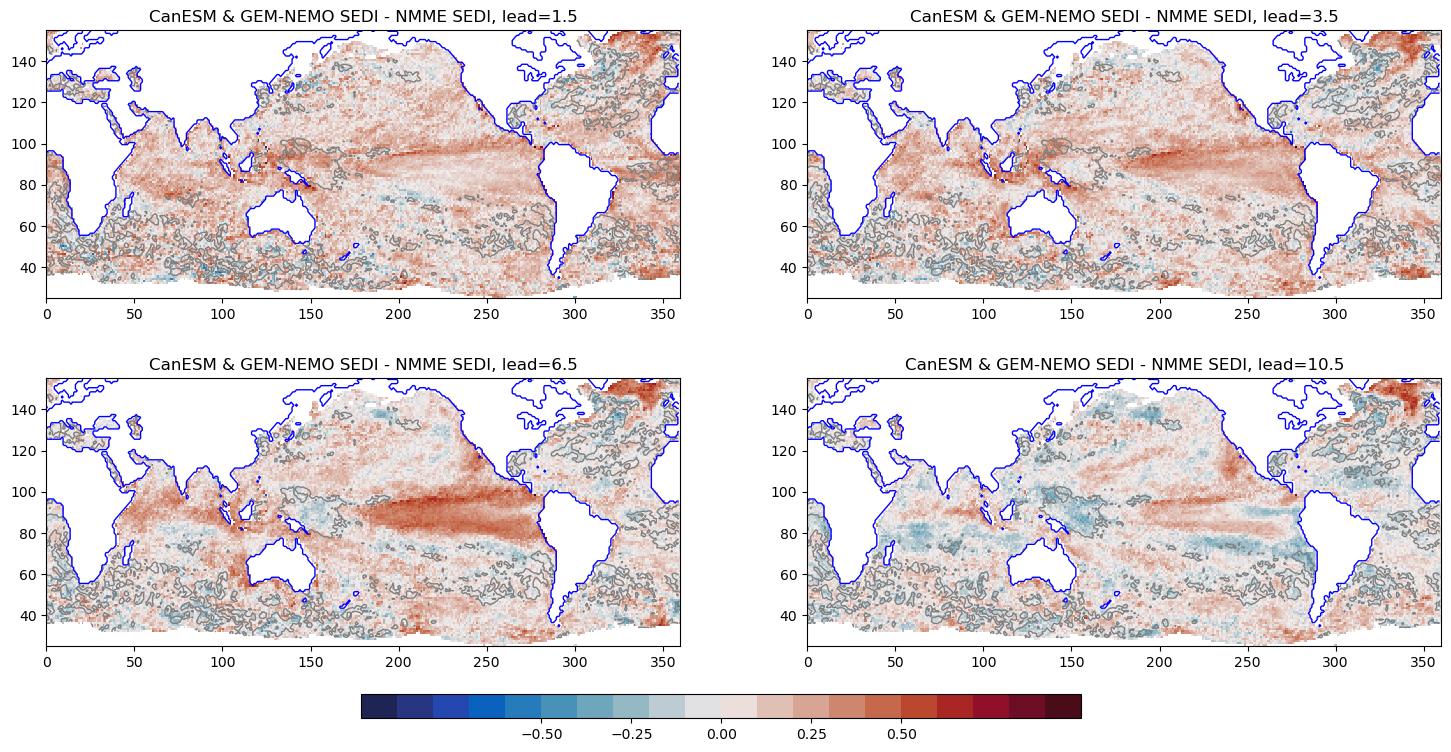

In [19]:
fig,axs=plt.subplots(2,2,figsize=(18,8),gridspec_kw={'hspace':.3})
vamp=.5
ax=axs[0,0]; il=1
CanSEDI=SEDICan[il]
MMESEDI=SEDINMME[il]
m1=ax.pcolormesh(CanSEDI-MMESEDI,vmin=-1*vamp,vmax=vamp,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
ax.set_ylim(25,155)
ax.set_title(f'CanESM & GEM-NEMO SEDI - NMME SEDI, lead={il+.5}')
m3=ax.contour(lm,linewidths=1,colors='b')

ax=axs[0,1]; il=3
CanSEDI=SEDICan[il]
MMESEDI=SEDINMME[il]
m1=ax.pcolormesh(CanSEDI-MMESEDI,vmin=-1*vamp,vmax=vamp,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
ax.set_ylim(25,155)
ax.set_title(f'CanESM & GEM-NEMO SEDI - NMME SEDI, lead={il+.5}')
m3=ax.contour(lm,linewidths=1,colors='b')

ax=axs[1,0]; il=6
CanSEDI=SEDICan[il]
MMESEDI=SEDINMME[il]
m1=ax.pcolormesh(CanSEDI-MMESEDI,vmin=-1*vamp,vmax=vamp,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
ax.set_ylim(25,155)
ax.set_title(f'CanESM & GEM-NEMO SEDI - NMME SEDI, lead={il+.5}')
m3=ax.contour(lm,linewidths=1,colors='b')

ax=axs[1,1]; il=10
CanSEDI=SEDICan[il]
MMESEDI=SEDINMME[il]
m1=ax.pcolormesh(CanSEDI-MMESEDI,vmin=-1*vamp,vmax=vamp,cmap=cmocean.cm.balance)
m2=ax.contour(SEDI,[0,],colors='gray',linewidths=1)
ax.set_ylim(25,155)
ax.set_title(f'CanESM & GEM-NEMO SEDI - NMME SEDI, lead={il+.5}')
m3=ax.contour(lm,linewidths=1,colors='b')

ml=fig.add_axes([.3,.02,.4,.03])
fig.colorbar(m,cax=ml,orientation='horizontal',ticks=[-1*vamp,-.5*vamp,0,.5*vamp,vamp])